# Day 3 AM - Inferential Statistics


In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ImportError: cannot import name 'animation' from partially initialized module 'matplotlib' (most likely due to a circular import) (C:\Users\OWNER\anaconda3\lib\site-packages\matplotlib\__init__.py)

## Resampling

Resampling in statistics means to repeatedly sample values from observed data, with a general goal of assessing random variability in a statistic. To understand what resampling is, let we look at the housing price in Amsterdam data distribution (histogram) below.

In [2]:
house_price = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/HousingPrices-Amsterdam-August-2021.csv')
house_price.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [29]:
house_price.shape # 924 data

(924, 8)

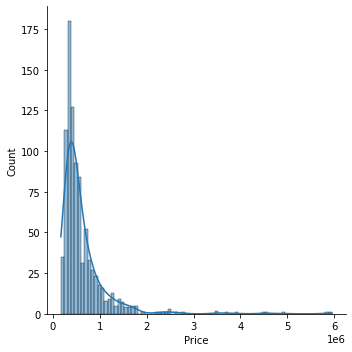

In [30]:
sns.displot(house_price.Price, kde=True, label='Housing Price in Amsterdam')

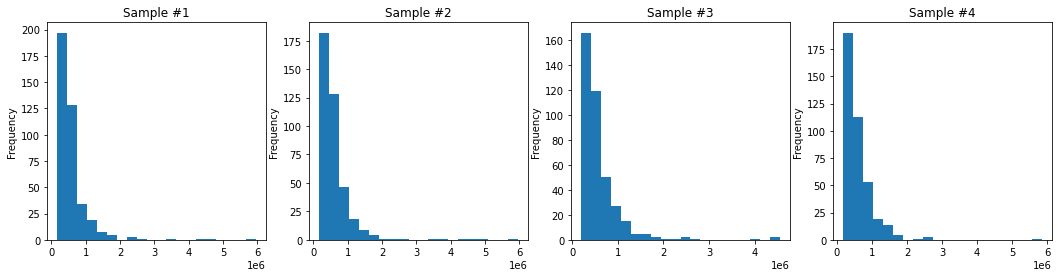

In [4]:
fig,ax = plt.subplots(ncols=4, figsize = (18,4))
for i in range(4):
  house_price.Price.sample(400).plot(kind='hist',bins=20,ax=ax[i])
  ax[i].set_title('Sample #{}'.format(i+1))

We take 100 samples randomly from the housing price data and we did it 4 times. The visualization show that their distribution look the same. It happend simply because of randomness.

## Implementation to Marketing Campaign Analysis

In this lesson, we will learn about hypothesis testing and how to implement it to a daily business case such as online retail. We will use the data from ML UCI dataset https://archive.ics.uci.edu/ml/datasets/online+retail.

In [5]:
data = pd.read_excel('https://github.com/fahmimnalfrzki/Additional-Materials/blob/main/online_retail_data.xlsx?raw=true').drop(columns='Unnamed: 0').sort_values('InvoiceDate',ascending=True).reset_index(drop=True)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom
1,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:02:00,2.10,17850.0,United Kingdom
2,536398,22752,SET 7 BABUSHKA NESTING BOXES,6,2010-12-01 10:52:00,8.50,13448.0,United Kingdom
3,536401,85150,LADIES & GENTLEMEN METAL SIGN,1,2010-12-01 11:21:00,2.55,15862.0,United Kingdom
4,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,16218.0,United Kingdom
...,...,...,...,...,...,...,...,...
9995,581501,22942,CHRISTMAS LIGHTS 10 SANTAS,12,2011-12-09 10:46:00,2.95,12985.0,United Kingdom
9996,581572,22627,MINT KITCHEN SCALES,4,2011-12-09 12:08:00,8.50,16705.0,United Kingdom
9997,581578,21507,ELEPHANT BIRTHDAY CARD,12,2011-12-09 12:16:00,0.42,12713.0,Germany
9998,581579,23353,6 GIFT TAGS VINTAGE CHRISTMAS,12,2011-12-09 12:19:00,0.83,17581.0,United Kingdom


In [6]:
data['StockCode'].value_counts()

85099B    43
85123A    40
47566     40
22423     36
20725     31
          ..
22053      1
22483      1
22103      1
84558A     1
79190A     1
Name: StockCode, Length: 2402, dtype: int64

### Single Sample Hypothesis Testing

Let we play a role. Suppose that during the last five years, our daily income is \$500 on average and during the last a year, we reach \$580 a day on average. Is it means that we're improved significantly?

In [7]:
data['income'] = data['Quantity']*data['UnitPrice']
data['date'] = data['InvoiceDate'].dt.date
daily_income = data[['date','income']].groupby('date').sum()
print('Average Income a Day for the last a year: ${}'.format(np.round(daily_income['income'].mean())))

Average Income a Day for the last a year: $580.0


To check whether our sales is significantly increase or not, we will perform the single sample one sided and set the significance level of 0.05. We use this method since we only test a variable and compare the sample (last a year data) and the population (we assume it is the last five years data).

Our hypothesis on this case:

**H0: μ <= \$500**

**H1: μ > \$500**

In [8]:
daily_income

,income
date,
2010-12-01,1000.20
2010-12-02,846.13
2010-12-03,924.86
2010-12-05,592.83
2010-12-06,1853.98
...,...
2011-12-05,1574.18
2011-12-06,1006.74
2011-12-07,467.56


In [9]:
t_stat,p_val = stats.ttest_1samp(daily_income.income, 500)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.0028745490601192387
t-statistics: 2.781482852334568


C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


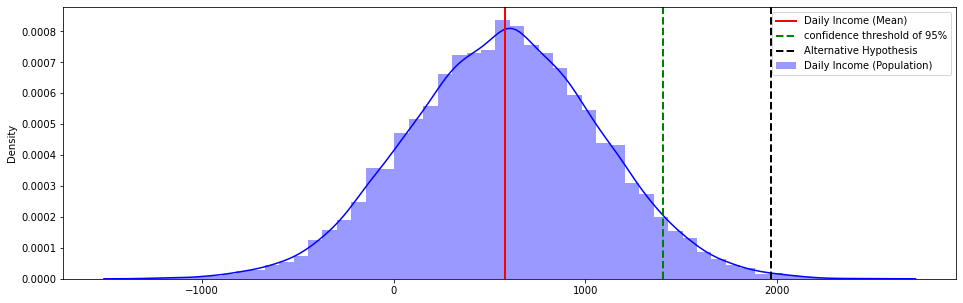

In [10]:
daily_income_pop = np.random.normal(daily_income.income.mean(), daily_income.income.std(), 10000)

ci = stats.norm.interval(0.90, daily_income.income.mean(), daily_income.income.std())

plt.figure(figsize=(16,5))
sns.distplot(daily_income_pop, label='Daily Income (Population)', color='blue')
plt.axvline(daily_income.income.mean(), color='red', linewidth=2, label='Daily Income (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(daily_income_pop.mean() + t_stat*daily_income_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

Since our p-value is less than 0.05, so we reject the null hypothesis and we can conclude that, our sales for the last a year is improved than the last five years. 

Note: T-statistics refers to how far the alternative hypothesis from null hypothesis away.

### One Sample Two Tailed

Our hypothesis on this case:

**H0: μ =\$500**

**H1: μ != \$500**

In [11]:
t_stat,p_val = stats.ttest_1samp(daily_income.income, 500)
print('P-value:',p_val) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.005749098120238477
t-statistics: 2.781482852334568


C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


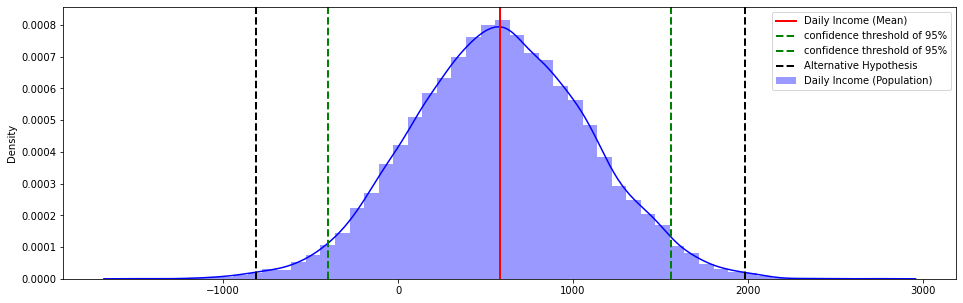

In [12]:
daily_income_pop = np.random.normal(daily_income.income.mean(), daily_income.income.std(), 10000)

ci = stats.norm.interval(0.95, daily_income.income.mean(), daily_income.income.std())

plt.figure(figsize=(16,5))
sns.distplot(daily_income_pop, label='Daily Income (Population)', color='blue')
plt.axvline(daily_income.income.mean(), color='red', linewidth=2, label='Daily Income (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(daily_income_pop.mean() + t_stat*daily_income_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(daily_income_pop.mean() - t_stat*daily_income_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

### Two Samples Independent Two Tailed Hypothesis Testing

Now, we want to check, whether daily average of sales of two countries are significantly different or not using two samples independent two tailed test. We will pick sample of France and Germany.

In [13]:
daily_france = data[data['Country']=='France'][['date','income']].groupby('date').sum()
daily_germany = data[data['Country']=='Germany'][['date','income']].groupby('date').sum()

print('Average sales of France a day: ${}'.format(np.round(daily_france.income.mean())))
print('Average sales of Germany a day: ${}'.format(np.round(daily_germany.income.mean())))

Average sales of France a day: $32.0
Average sales of Germany a day: $37.0


Our hypothesis on this case:

**H0: μ_france = μ_germany**

**H1: μ_france != μ_germany**

In [14]:
t_stat, p_val = stats.ttest_ind(daily_france,daily_germany)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 0.42798052232930384
t-statistics: -0.7943449043302956


C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\OWNER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


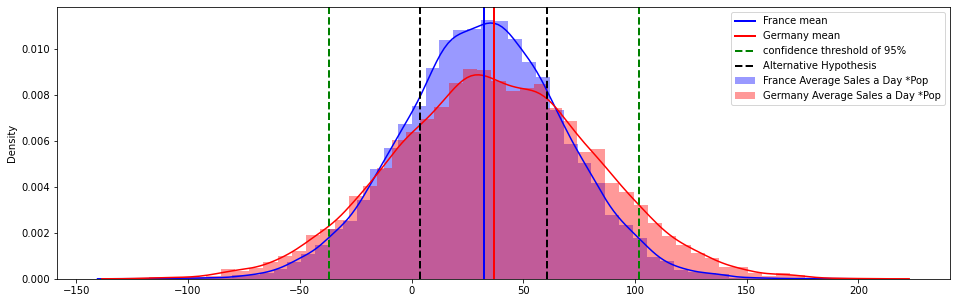

In [15]:
france_pop = np.random.normal(daily_france.income.mean(),daily_france.income.std(),10000)
germany_pop = np.random.normal(daily_germany.income.mean(),daily_germany.income.std(),10000)

ci = stats.norm.interval(0.95, daily_france.income.mean(), daily_france.income.std())
plt.figure(figsize=(16,5))
sns.distplot(france_pop, label='France Average Sales a Day *Pop',color='blue')
sns.distplot(germany_pop, label='Germany Average Sales a Day *Pop',color='red')

plt.axvline(daily_france.income.mean(), color='blue', linewidth=2, label='France mean')
plt.axvline(daily_germany.income.mean(), color='red',  linewidth=2, label='Germany mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(france_pop.mean()+t_stat[0]*france_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(france_pop.mean()-t_stat[0]*france_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Based on the result above, we can conclude that we accept the null hypothesis which between the france and germany are not significantly different in terms of average sales per day.

## ANOVA

ANOVA is similar to the t-test. It used for testing whether more than two variables are significantly different or not. So, we will test whether the mean of daily sales of IEV,N8U, and U5F are significantly different or not.

In [16]:
scanner_data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/scanner_data.csv')
scanner_data

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...,...
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57


In [17]:
scanner_data.groupby('Date').sum()

,Unnamed: 0,Customer_ID,Transaction_ID,Quantity,Sales_Amount
Date,,,,,
01/02/2016,3923150,1620617,1896805,482.75,4341.46
01/03/2016,7432990,1616766,3579179,497.00,4436.42
01/04/2016,14016165,4846347,6867307,553.00,4637.34
01/05/2016,7644374,1820535,3779664,217.00,1514.17
01/06/2016,19708741,5149729,9793228,572.66,4750.01
...,...,...,...,...,...
31/05/2016,19960359,5266971,9915835,522.00,4186.64
31/07/2016,16666761,1896920,4742452,169.00,1341.96
31/08/2016,24788181,4674456,13660542,477.67,3955.78


In [18]:
IEV_quantity = scanner_data[scanner_data.SKU_Category == 'IEV'].groupby('Date').sum()['Quantity']
N8U_quantity = scanner_data[scanner_data.SKU_Category == 'N8U'].groupby('Date').sum()['Quantity']
U5F_quantity = scanner_data[scanner_data.SKU_Category == 'U5F'].groupby('Date').sum()['Quantity']

print("Daily Average of IEV",IEV_quantity.mean())
print("Daily Average of N8U",N8U_quantity.mean())
print("Daily Average of U5F",U5F_quantity.mean())

Daily Average of IEV 22.915254237288135
Daily Average of N8U 33.46556473829201
Daily Average of U5F 22.610340909090908


It seems that they are significantly different since N8U average is 33s and the rest is 22s.

In [19]:
f_stat,p_value = stats.f_oneway(IEV_quantity, N8U_quantity, U5F_quantity)
print('P-value:',p_value)

P-value: 6.049412282955515e-36


since the p-value is below 0.05, then we conclude that the difference of IEV, N8U, and U5F is statistically significant.

## Paired Test
**Implementation on A/B Testing**

We're dealing with the marketing division of game developer company to analyze which game version that tend to give more retention rate? Is it correct that we upgrade our game from gate 30 to gate 40 version? (Data from https://www.kaggle.com/yufengsui/mobile-games-ab-testing) We will use retention_1 data which capture the information that did the player come back and play 1 day after installing.

In [20]:
cookie_cats = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/cookie_cats.csv')
cookie_cats

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [21]:
gate_30 = cookie_cats[cookie_cats['version']=='gate_30']['retention_1'].replace({True:1,False:0})
gate_40 = cookie_cats[cookie_cats['version']=='gate_40']['retention_1'].replace({True:1,False:0})

print('Retention rate of gate 30 version:',gate_30.sum()/gate_30.count())
print('Retention rate of gate 40 version:',gate_40.sum()/gate_40.count())

Retention rate of gate 30 version: 0.4481879194630872
Retention rate of gate 40 version: 0.44228274967574577


In [22]:
gate_30

0        0
1        1
6        0
11       0
13       1
        ..
90179    1
90180    0
90182    1
90183    0
90186    1
Name: retention_1, Length: 44700, dtype: int64

In [23]:
gate_40

2        1
3        0
4        1
5        1
7        0
        ..
90181    1
90184    1
90185    0
90187    1
90188    0
Name: retention_1, Length: 45489, dtype: int64

The retention rate between those versions is slightly different. Is the difference truly the same or because of chance?

To make sure of our result, we will check using paired test two sided.

Our hypothesis on this case:

**H0: μ_gate30 = μ_gate40**

**H1: μ_gate30 != μ_gate40**

In [24]:
t_stat,p_val = stats.ttest_rel(gate_30.sample(40000),gate_40.sample(40000)) #we take 40000 sample of each data to make the size the same.
print('P-value:',p_val)

P-value: 0.057941358056651446


Since the p-value is more than 0.05, we conclude that we accept the Null hypothesis which means between gate 30 and 40 version is the same. We safely upgrade our game into gate 40 version.

## Chi-Square Test

Chi-square test is used for testing of independence between two categorical data. Since statistics handling the numerical data, we need to calculate the frequency of each variable and presented by a contingency table.

In [25]:
chi_df=pd.read_csv('https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/chi-test.csv')
chi_df

,Gender,Like Shopping?
0,Male,No
1,Female,Yes
2,Male,Yes
3,Female,Yes
4,Female,Yes
5,Male,Yes
6,Male,No
7,Female,No
8,Female,No


In [26]:
contingency_table=pd.crosstab(chi_df["Gender"],chi_df["Like Shopping?"])
contingency_table

Like Shopping?,No,Yes
Gender,,
Female,2,3
Male,2,2


In [27]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p=1.000
Probably independent
